<a href="https://colab.research.google.com/github/TugaAhmed/ECoG_motor_imagery/blob/main/projects/Convert_Data_to_MNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install mne --quiet
!pip install nilearn --quiet
!pip install nimare --quiet
!pip install duecredit --quiet

from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [24]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mne.viz import plot_alignment, snapshot_brain_montage

In [25]:
# @title Data retrieval
import os, requests

fname = 'motor_imagery.npz'
url = "https://osf.io/ksqv8/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [26]:
alldat = np.load(fname, allow_pickle=True)['dat']

In [48]:
sub0_array = alldat[0][1]['V'].T
sub0_array.shape

(46, 376600)

In [114]:
# Create some dummy metadata
n_channels = 46
sampling_freq = 1000  # in Hertz
info = mne.create_info(n_channels, sfreq=sampling_freq , ch_types=['ecog']*46)
info['description'] = ' ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks.'
info['bads'] = []  # Names of bad channels

In [115]:
sub0_raw = mne.io.RawArray(sub0_array, info ,verbose=False)
sub0_raw.pick_types(ecog=True)


<RawArray | 46 x 376600 (376.6 s), ~132.2 MB, data loaded>

In [116]:
# events
events = []

for i , stim_id in enumerate(alldat[0][1]['stim_id']):
  events.append([alldat[0][1]['t_on'][i] ,  0 , stim_id ])

event_id = dict(hand=12 , tongue=11)

In [121]:
epochs = mne.Epochs(sub0_raw, events, event_id , epoch_length, baseline=None ,  tmax=5)

Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated


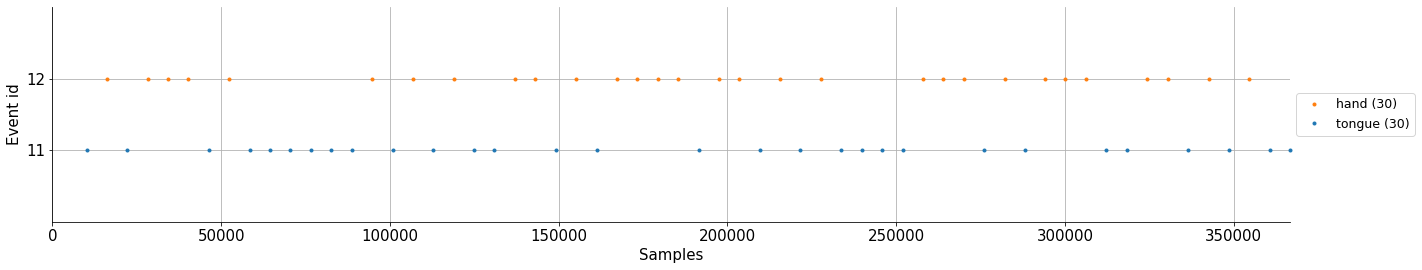

In [122]:
mne.viz.plot_events(events,event_id=event_id);

In [124]:
# sub0_raw.plot(n_channels=4) ;

In [110]:
# epochs.plot_image()